In [1]:
%matplotlib inline
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors, linear_model, datasets
sns.set()

## Simple Nearest Neighbors Classifier

This uses the simple play tennis dataset.

In [2]:
col_names = "rain,hot temp.,mild temp.,High Humidity,Strong winds,playTennis"
my_tennis_data = np.array(
      [[0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1],
       [1, 0, 1, 1, 1, 0]])

In [3]:
### select all rows except last column
X_matrix = my_tennis_data[:, :-1]
Y = my_tennis_data[:, -1]

In [4]:
knearest_clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform') # Keep varying k by changing n_neighbors
knearest_clf.fit(X_matrix, Y)

KNeighborsClassifier()

Take note that in the final classification that the classifier takes a "vote" between the 5 neighbors so even though this is trained on the exact data we're predicting it's not guaranteed to get the same value back as more neighbors went the other way.  This is actually a good thing, because this prevents overfitting.

In [5]:
print("predicted:", knearest_clf.predict(X_matrix[-2:,:]))
print("truth", Y[-2:])

predicted: [1 1]
truth [1 0]


## Linear Regression

It helps to think of linear regression as fitting a line to a set of data, but this is a special case for a 2 dimensional dataset (1 target and one 1 feature).  In the 3 dimensions (1 target and 2 features) we are actually fitting a plane and in higher dimensions we are fitting a hyper plane.  It's fairly straight forward to plot a line so we'll look at that special case first.  Then we'll look at the the general case of a many dimensional dataset.
First we will look at a dataset

In [20]:
diabetes = datasets.load_diabetes()

print("nFeatures =", diabetes.data.shape)  # 10 features, 442 instances

#Loading data for the X (We will use only one feature here)
diabetes_X = diabetes.data[:, 2]
print(diabetes_X.shape)
# print(diabetes_X)

nFeatures = (442, 10)
(442,)


In [7]:
diabetes_X = diabetes_X.reshape(-1, 1)  #convert to from single dimension vector to a Nx1 vector
print(diabetes_X.shape)

(442, 1)


Coefficients: [938.23786125]
Mean Squared Error: 2548.07
R^2 score: 0.47


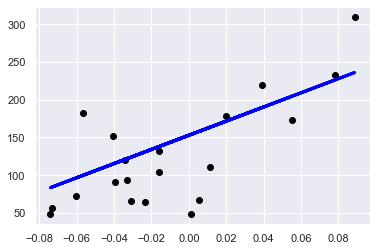

In [8]:
#Splitting training and testing data (features)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

#Splitting training and testing data (target)
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Linear regression
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients:', regr.coef_)
# The mean square error
print("Mean Squared Error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('R^2 score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.show()

The code below here is pretty much the same as what's above.  Except we select the entirety of the features instead of just one.  Where we will run into issue is plotting.  How do you plot a hyperplane of 11 dimensions?  There's a couple things you can do: 1) you can perform dimensionality reduction but then your line is no longer a line, or you can slice the 11 dimensions into sets of 2 dimensions by setting all the other dimensions to a value, common choices are the origin (0) or the mean.

nFeatures = (442, 10)
Coefficients: [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
Mean Squared Error: 2004.57
R^2 score: 0.59


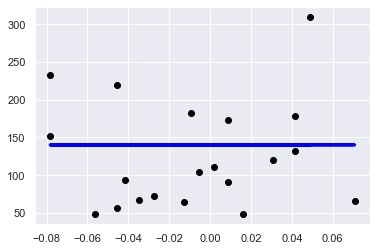

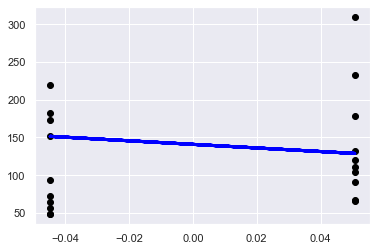

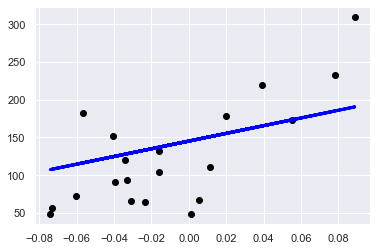

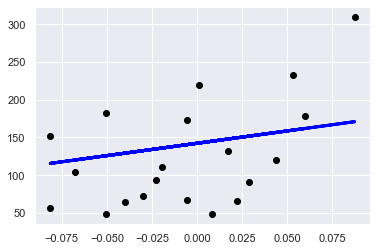

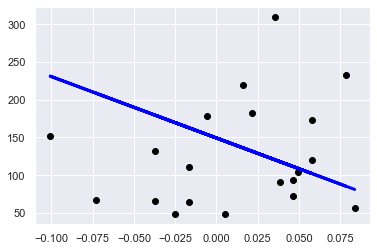

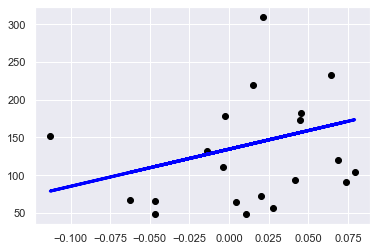

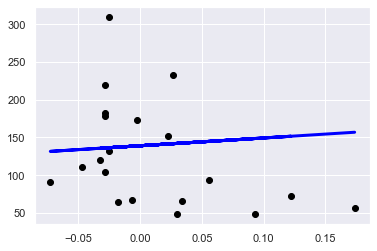

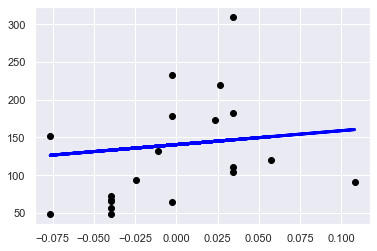

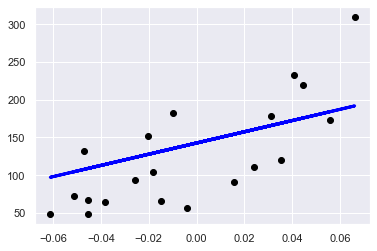

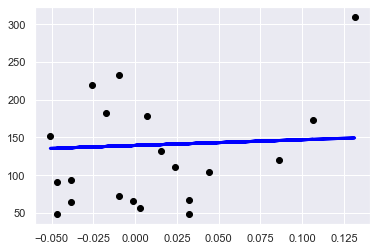

In [9]:
diabetes = datasets.load_diabetes()

print("nFeatures =", diabetes.data.shape)  # 10 features, 442 instances

#Loading data for the X  and we'll use all features
diabetes_X = diabetes.data

#everything below here is copy/paste until we get to plotting

#Splitting training and testing data (features)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

#Splitting training and testing data (target)
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Linear regression
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients:', regr.coef_)
# The mean square error
print("Mean Squared Error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('R^2 score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs, this is not expected to be done on the homework
for i in range(10):
    f = plt.figure()
    ax = f.add_subplot(111)
    
    diabetes_X_slice = np.zeros(diabetes_X_test.shape)
    diabetes_X_slice += diabetes_X_test.mean(axis=0)
    diabetes_X_slice[:, i] = diabetes_X_test[:, i]

    ax.scatter(diabetes_X_test[:, i], diabetes_y_test,  color='black')
    ax.plot(diabetes_X_test[:, i], regr.predict(diabetes_X_slice), color='blue',
             linewidth=3)

    plt.show()

Since the API is the same for all classifiers re-running this same dataset through a KNN regressor is fairly simple.  Here we do that and plot the metrics

In [10]:
knn_regression = neighbors.KNeighborsRegressor(n_neighbors=4, weights='uniform')
knn_regression.fit(diabetes_X_train, diabetes_y_train)

print("Mean Squared Error: %.2f"
      % np.mean((knn_regression.predict(diabetes_X_test) - diabetes_y_test) ** 2))
print('R^2: %.2f' % knn_regression.score(diabetes_X_test, diabetes_y_test))

Mean Squared Error: 2845.28
R^2: 0.41


## Logistic Regression

Here we run the iris dataset through a logistic regression classifier.  To see which labels receive the worst classifications we plot a confusion matrix.  This tells which true classes where predicted correctly or given wrong predictions.


[[7.91288101e-02 5.95997255e-01 3.24873935e-01]
 [5.59202308e-03 6.70393654e-01 3.24014323e-01]
 [9.63390621e-01 1.87593524e-02 1.78500270e-02]
 [2.63814501e-04 1.23792602e-01 8.75943583e-01]
 [9.12198389e-01 7.15444041e-02 1.62572064e-02]
 [6.02516902e-02 3.33148798e-01 6.06599512e-01]
 [9.36301035e-01 5.11632858e-02 1.25356793e-02]
 [6.51270312e-03 2.45866003e-01 7.47621294e-01]
 [1.71567218e-03 2.58402771e-01 7.39881557e-01]
 [2.77095400e-02 5.12654661e-01 4.59635799e-01]
 [1.45972437e-02 5.56356727e-01 4.29046029e-01]
 [3.02546474e-02 3.23966333e-01 6.45779020e-01]
 [2.77095400e-02 5.12654661e-01 4.59635799e-01]
 [5.91521552e-03 3.62699920e-01 6.31384865e-01]
 [3.79489515e-02 4.89161120e-01 4.72889928e-01]
 [9.66621061e-01 2.72747269e-02 6.10421204e-03]
 [5.44149128e-02 5.19846068e-01 4.25739019e-01]
 [1.09677685e-01 6.92833407e-01 1.97488908e-01]
 [8.29945639e-01 1.51746663e-01 1.83076975e-02]
 [9.34481519e-01 3.98768785e-02 2.56416022e-02]
 [1.48020713e-01 6.12408867e-01 2.395704

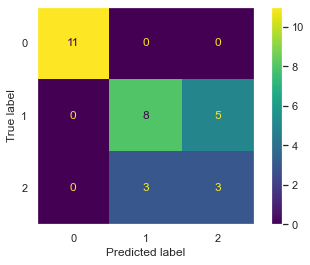

In [11]:
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

logreg = linear_model.LogisticRegression(solver="lbfgs", multi_class="auto")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logreg.fit(X_train, y_train)
probs = logreg.predict_proba(X_test)
print(probs)

predicted = logreg.predict(X_test)

print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

metrics.plot_confusion_matrix(logreg, X_test, y_test).ax_.grid(False)  # the seaborn library adds grids to everything
# so we turn that off 

Looking at the confusion matrix we can see that label 0 was correctly prediced each time and that the errors happened when predicting 1 and 2 and between 1 and 2.